<a href="https://colab.research.google.com/github/ShawnLiu119/BTCPred-ARIMA-RNN/blob/main/btcpred.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
###########################################################################################################
######################################## BTC - Test Run 1 #################################################
###################################### author: Shawn Liu ##################################################

In [1]:
import pandas as pd
import numpy as np
import os
import re

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
path = '/content/drive/MyDrive/BTC-Pred/bitstampUSD_1-min_data_2012-01-01_to_2021-03-31.csv'
df = pd.read_csv(path)

In [6]:
df.isna().sum()

Timestamp                  0
Open                 1243608
High                 1243608
Low                  1243608
Close                1243608
Volume_(BTC)         1243608
Volume_(Currency)    1243608
Weighted_Price       1243608
dtype: int64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4857377 entries, 0 to 4857376
Data columns (total 8 columns):
 #   Column             Dtype  
---  ------             -----  
 0   Timestamp          int64  
 1   Open               float64
 2   High               float64
 3   Low                float64
 4   Close              float64
 5   Volume_(BTC)       float64
 6   Volume_(Currency)  float64
 7   Weighted_Price     float64
dtypes: float64(7), int64(1)
memory usage: 296.5 MB


In [10]:
df.describe()

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
count,4.857377e+06,3.613769e+06,3.613769e+06,3.613769e+06,3.613769e+06,3.613769e+06,3.613769e+06,3.613769e+06
mean,1.471301e+09,6.009024e+03,6.013357e+03,6.004488e+03,6.009014e+03,9.323249e+00,4.176284e+04,6.008935e+03
std,8.428019e+07,8.996247e+03,9.003521e+03,8.988778e+03,8.996360e+03,3.054989e+01,1.518248e+05,8.995992e+03
min,1.325318e+09,3.800000e+00,3.800000e+00,1.500000e+00,1.500000e+00,0.000000e+00,0.000000e+00,3.800000e+00
25%,1.398179e+09,4.438600e+02,4.440000e+02,4.435200e+02,4.438600e+02,4.097759e-01,4.521422e+02,4.438306e+02
50%,1.471428e+09,3.596970e+03,3.598190e+03,3.595620e+03,3.597000e+03,1.979811e+00,3.810124e+03,3.596804e+03
75%,1.544288e+09,8.627270e+03,8.632980e+03,8.621090e+03,8.627160e+03,7.278216e+00,2.569821e+04,8.627637e+03
max,1.617149e+09,6.176356e+04,6.178183e+04,6.167355e+04,6.178180e+04,5.853852e+03,1.390067e+07,6.171621e+04


Some initial first-look findings:

- a lot of NaN values
- all numeric(float) columns excpet Timestamp, similar to stock market data

## GOAL 1 - Predict BTC Price as Time Series

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
from scipy import stats
import statsmodels.api as sm
import warnings
from itertools import product
from datetime import datetime
warnings.filterwarnings('ignore')
plt.style.use('seaborn-poster')

In [12]:
df.Timestamp = pd.to_datetime(df.Timestamp, unit='s')   #convert unix time to normal time stamp; unit 's' represent second

In [15]:
df.index = df.Timestamp #to resample (frequency conversion) the dataset, the timeseries column needed to be set as index

df_day = df.resample('D').mean() #resample to daily frequency and aggregate with average
df_month = df.resample('M').mean()
df_quarter = df.resample('Q-DEC').mean()
df_hour = df.resample('60min').mean()

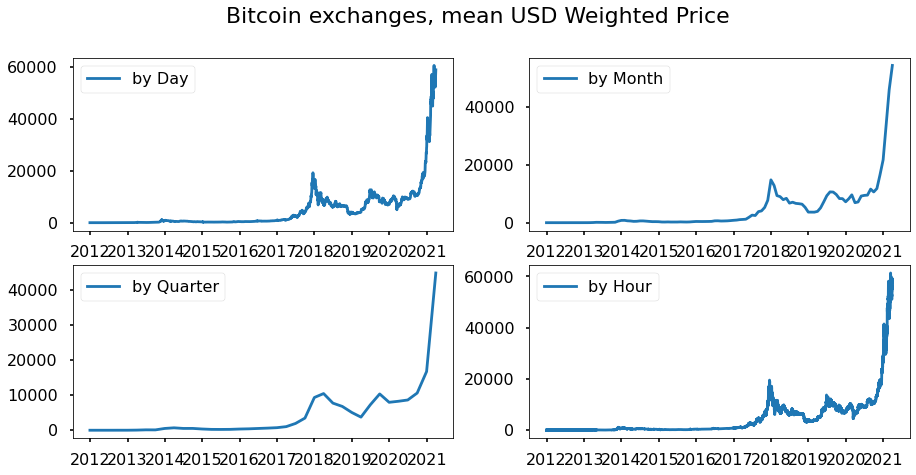

In [17]:
#plot the data

fig = plt.figure(figsize=[15,7])
plt.suptitle('Bitcoin exchanges, mean USD Weighted Price', fontsize=22)

plt.subplot(221)
plt.plot(df_day.Weighted_Price, '-', label = 'by Day') #average the weighted price per daily basis
plt.legend()

plt.subplot(222)
plt.plot(df_month.Weighted_Price, '-', label = 'by Month') #average the weighted price per monthly basis
plt.legend()

plt.subplot(223)
plt.plot(df_quarter.Weighted_Price, '-', label = 'by Quarter') #average the weighted price per quarterly basis
plt.legend()

plt.subplot(224)
plt.plot(df_hour.Weighted_Price, '-', label = 'by Hour') #average the weighted price per hourly basis
plt.legend()

plt.show()